<a href="https://colab.research.google.com/github/martinsadw/imersao-gemini-alura/blob/main/project_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q -O projects_data.csv https://raw.githubusercontent.com/martinsadw/imersao-gemini-alura/main/alura_projects.csv

In [2]:
# Baixa e atualiza a biblioteca necessária
!pip install -q -U google-generativeai

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import nltk
from nltk.corpus import stopwords

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
pt_stopwords = set(stopwords.words('portuguese'))
print(list(pt_stopwords)[:10])

['o', 'isso', 'será', 'tivermos', 'você', 'hajam', 'sejamos', 'estivéramos', 'um', 'nossa']


In [6]:
# Importa o Python SDK
import google.generativeai as genai
# Usado para obter a chave armazenada no Colab
from google.colab import userdata

# Obtem a chave armazenado com o nome 'GOOGLE_API_KEY' no Colab
# Lembrar de clicar no botão de switch para liberar o acesso para o notebook
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# 1. Ler os dados

In [7]:
projects_data = pd.read_csv('projects_data.csv', parse_dates=['enviado'])
projects_data

,autor,link,descricao,enviado,estrelas
0,Erik Teixeira Barbosa,https://github.com/ErikTeixeira/projeto_ia.git,"Conheça o ChefBot, seu assistente de planejame...",2024-05-11 14:32:00,6
1,Alléxia,https://github.com/allexia1/desafio-imersao-ia,Chatbot para Plano de Negócios com API Gemini ...,2024-05-11 14:32:00,2
2,Silvio Felipe Pereira Gil,NaN,Chat GPT,2024-05-11 14:33:00,2
3,Matheus Monclai das Chagas Pizziolo,https://github.com/monclai/assistente_estudantil,Professor particular para auxiliar estudante e...,2024-05-11 14:34:00,12
4,Sadi Eloi Closs Junior,https://github.com/Rargren/Projeto_Imersao_IA,Um ChatBot simples para execução de uma campan...,2024-05-11 14:34:00,2
...,...,...,...,...,...
804,Vinícius Azevedo de Lima,https://github.com/azvin98/Developer_LLM,O objetivo deste projeto é auxiliar os desenvo...,2024-05-09 20:20:00,4
805,Erick Prados Pereira,https://github.com/Falis-EPG/Projeto-Gemini,Este projeto é um projeto real que foi feito p...,2024-05-09 12:34:00,16
806,Marlon Paulo Menezes dos Reis,https://github.com/SouEuMarlon/travel_tips,Uma aplicação para gerar um roteiro de viagem ...,2024-05-09 12:53:00,22
807,David Duarte Muniz,https://gist.github.com/DavidDuarteMuniz/cf562...,Projeto de um site de Biologia com informações...,2024-05-09 13:22:00,11


In [8]:
projects_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   autor      809 non-null    object        
 1   link       808 non-null    object        
 2   descricao  809 non-null    object        
 3   enviado    809 non-null    datetime64[ns]
 4   estrelas   809 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 31.7+ KB


In [9]:
projects_data.describe()

,enviado,estrelas
count,809,809.000000
mean,2024-05-10 20:35:00.741656320,8.932015
min,2024-05-09 12:34:00,1.000000
25%,2024-05-10 13:50:00,3.000000
50%,2024-05-10 21:49:00,4.000000
75%,2024-05-11 04:21:00,9.000000
max,2024-05-12 03:47:00,113.000000
std,NaN,13.417665


# 2. Análise dos dados

## 2.1. Autores de multiplos projetos

Alguns desses projetos foram apenas resubmissões do mesmo projeto

In [10]:
multi_projects_authors = projects_data[projects_data['autor'].duplicated(keep=False)].sort_values('autor')
print('Número de autores com mais de um projeto:', len(multi_projects_authors['autor'].unique()))
print('Número de projetos desses autores:', len(multi_projects_authors))

Número de autores com mais de um projeto: 23
Número de projetos desses autores: 51


In [11]:
multi_projects_authors

,autor,link,descricao,enviado,estrelas
686,Anderson,https://github.com/A249999/Projeto-aula-04/blo...,quickstart_colab.ipynb,2024-05-10 01:10:00,3
468,Anderson,https://github.com/A249999/CHAT_BOT_ALURA/blob...,CHAT_BOT_ALURA,2024-05-10 20:22:00,2
413,Anderson,https://github.com/A249999/SISTEMA_DOCUMENTOS_...,SISTEMA_DOCUMENTOS_ALURA,2024-05-10 21:45:00,2
111,André Marto,https://github.com/andreavenue/gerador_landing...,Uma plataforma revolucionária que gera copywri...,2024-05-11 11:41:00,2
466,André Marto,https://github.com/andreavenue/maquina_do_temp...,Imagine a oportunidade única de conversar com ...,2024-05-10 20:11:00,4
606,Antonino Marques Jares,https://github.com/Antonino-Marques-Jares/Gram...,O usuário passa frases e a IA Gemini classific...,2024-05-10 14:03:00,3
605,Antonino Marques Jares,https://github.com/Antonino-Marques-Jares/Gram...,O usuário passa frases e a IA classifica a gra...,2024-05-10 13:59:00,3
22,Charles Quevedo Carpes,https://github.com/CharlesCarpes/suporte_multi...,# Dê Visão ao Mundo: IA que Descreve Imagens p...,2024-05-12 03:02:00,2
292,Charles Quevedo Carpes,https://github.com/CharlesCarpes/suporte_multi...,Um assistente virtual pensado para que pessoas...,2024-05-10 23:50:00,5
443,Claudio Marcio Fontana,https://github.com/claudiomfontana/Projeto_Ime...,Este projeto implementa um chatbot que auxilia...,2024-05-10 19:32:00,2


## 2.2. Estrelas

In [12]:
num_projects = 30
projects_top = projects_data.sort_values('estrelas', ascending=False).head(num_projects)
print('Número médio de estrelas por projeto:', projects_data['estrelas'].mean())
print(f'Número de estrelas para estar entre os {num_projects} projetos mais populares:', projects_top['estrelas'].min())

Número médio de estrelas por projeto: 8.932014833127317
Número de estrelas para estar entre os 30 projetos mais populares: 44


In [13]:
projects_top

,autor,link,descricao,enviado,estrelas
781,Giovanna da Silva de Oliveira,https://github.com/Giovanna-de-Oliveira/Portif...,O foco deste projeto é abordar a detecção do u...,2024-05-09 17:52:00,113
764,Victor Verdoodt,https://github.com/victorverdoodt/Disaster-Res...,O projeto Disaster Response Coordinator é uma ...,2024-05-09 14:01:00,105
640,Claudio César Martins,https://github.com/claudiocmm/My_Polyglot_App,Aprenda idiomas como nunca antes com My Polygl...,2024-05-10 04:33:00,87
521,Kaled Freire Barreto,https://github.com/kaledbarreto/SophIA,"Olá pessoal! Sou a Sophia, a Sábia! Uma profe...",2024-05-10 19:09:00,83
579,Tomas Rodrigues Alessi,https://github.com/alessitomas/EmpregoConnect,O EmpregoConnect é uma plataforma que conta co...,2024-05-10 12:42:00,81
761,Bruno da Silva,https://github.com/bruninho-design/AjudaOSul.A...,O AjudaOSul.AI é um projeto de código aberto q...,2024-05-09 23:48:00,81
798,Laysa Maria Nascimento Alves,https://github.com/laysaalves/medgrandma-ai,Criei o MedGrandma.ai inspirado na minha vida ...,2024-05-09 19:35:00,79
356,Ellen Karolina do Couto Gomes de Oliveira,https://github.com/EllenKarolina1/projeto-imer...,Chatbot que entrega copy de criativos de socia...,2024-05-10 22:57:00,75
349,Alielson Ferreira Pequeno,https://github.com/alielsonfp/DataGemini/tree/...,DataGemini é uma ferramenta poderosa que combi...,2024-05-10 22:44:00,72
245,Eduardo Freitas,https://github.com/eduardoboca/YouTubeClipper,YouTubeClipper é uma ferramenta que facilita a...,2024-05-11 01:39:00,71


In [14]:
fig = px.histogram(projects_data, x='estrelas', title='Histograma do número de estrelas')
fig.update_layout(xaxis_title='Número de estrelas', yaxis_title='Número de projetos')
fig.show()

## 2.3. Link do projeto

In [15]:
# Extrai o domínio dos links
projects_data['dominio'] = projects_data['link'].str.extract(r'https?://([^/]+)')
projects_data['dominio'].value_counts()

dominio
github.com                   799
1drv.ms                        1
kauecodify.github.io           1
colab.research.google.com      1
cloud.google.com               1
gemini.google.com              1
www.gitkraken.com              1
www.linkedin.com               1
www.notion.so                  1
gist.github.com                1
Name: count, dtype: int64

In [16]:
# Extrai o nome do projeto do link do GitHub
projects_data['titulo'] = projects_data['link'].str.extract(r'https?://github.com/[^/]+/([^/]+)')

In [17]:
projects_data.query('dominio != "github.com"')

,autor,link,descricao,enviado,estrelas,dominio,titulo
2,Silvio Felipe Pereira Gil,NaN,Chat GPT,2024-05-11 14:33:00,2,NaN,NaN
13,joão ribeiro,https://1drv.ms/w/s!AlE7thG6w5Dkg1SCwCCe7u6iCm...,documento,2024-05-11 14:44:00,1,1drv.ms,NaN
162,Kaue caires dos santos souza,https://kauecodify.github.io/GeoPrevent/,GeoPrevent: O projeto GeoPrevent foi feito por...,2024-05-11 05:41:00,3,kauecodify.github.io,NaN
244,LUCIANE MARIA MICHELETTI TONON,https://colab.research.google.com/gist/luciane...,Primeira vez que mexo com programação na vida....,2024-05-11 01:34:00,9,colab.research.google.com,NaN
336,Rogéria Cilião Nassarden,https://cloud.google.com/innovators?hl=pt-br,Aprendendo e Inovando,2024-05-11 01:24:00,6,cloud.google.com,NaN
457,Lavinia Matos,https://gemini.google.com/app,Proposta de viagem,2024-05-10 19:53:00,2,gemini.google.com,NaN
593,Junior Dias,https://www.gitkraken.com/lp/github-integratio...,"Olá bom dia, Meu nome é Junior Dias e sou Desi...",2024-05-10 13:26:00,4,www.gitkraken.com,NaN
778,Valdirene da Paixão Sousa,https://www.linkedin.com/in/valdirene-paix%C3%...,Uso do Google Gemini,2024-05-09 17:10:00,4,www.linkedin.com,NaN
803,Jaqueline Guimarães da Silva,https://www.notion.so/Ol-eu-sou-a-Jaqueline-Gu...,Desenvolvimento de um Ecossistema de Cuidados ...,2024-05-09 20:18:00,4,www.notion.so,NaN
807,David Duarte Muniz,https://gist.github.com/DavidDuarteMuniz/cf562...,Projeto de um site de Biologia com informações...,2024-05-09 13:22:00,11,gist.github.com,NaN


## 2.4. Descrição

In [18]:
projects_data['descricao_caracteres'] = projects_data['descricao'].str.len()
projects_data['descricao_palavras'] = projects_data['descricao'].apply(lambda row: len(row.split(' ')))

In [19]:
fig = px.histogram(projects_data, x='descricao_palavras', title='Histograma tamanho da descrição em palavras')
fig.update_layout(xaxis_title='Tamanho da descrição em palavras', yaxis_title='Número de projetos')
fig.show()

In [20]:
fig = px.scatter(projects_data, x='descricao_palavras', y='estrelas', title='Relação entre tamanho da descrição e número de estrelas')
fig.update_layout(xaxis_title='Tamanho da descrição em palavras', yaxis_title='Número de estrelas')
fig.show()

## 2.5 Data de envio

In [21]:
projects_sent = projects_data.set_index('enviado').sort_index().resample('1h')['estrelas'].mean()
fig = px.line(x=projects_sent.index, y=projects_sent, title='Número médio de estrelas por projeto')
fig.update_layout(xaxis_title='Horário', yaxis_title='Número médio de estrelas')
fig.show()

In [22]:
projects_data['enviado_hora'] = projects_data['enviado'].round('1h')

In [23]:
fig = px.scatter(projects_data, x='enviado', y='estrelas', title='Número de estrelas por projeto', opacity=0.7)
fig.update_layout(xaxis_title='Horário', yaxis_title='Número de estrelas')
fig.show()

## 2.6. Wordcloud

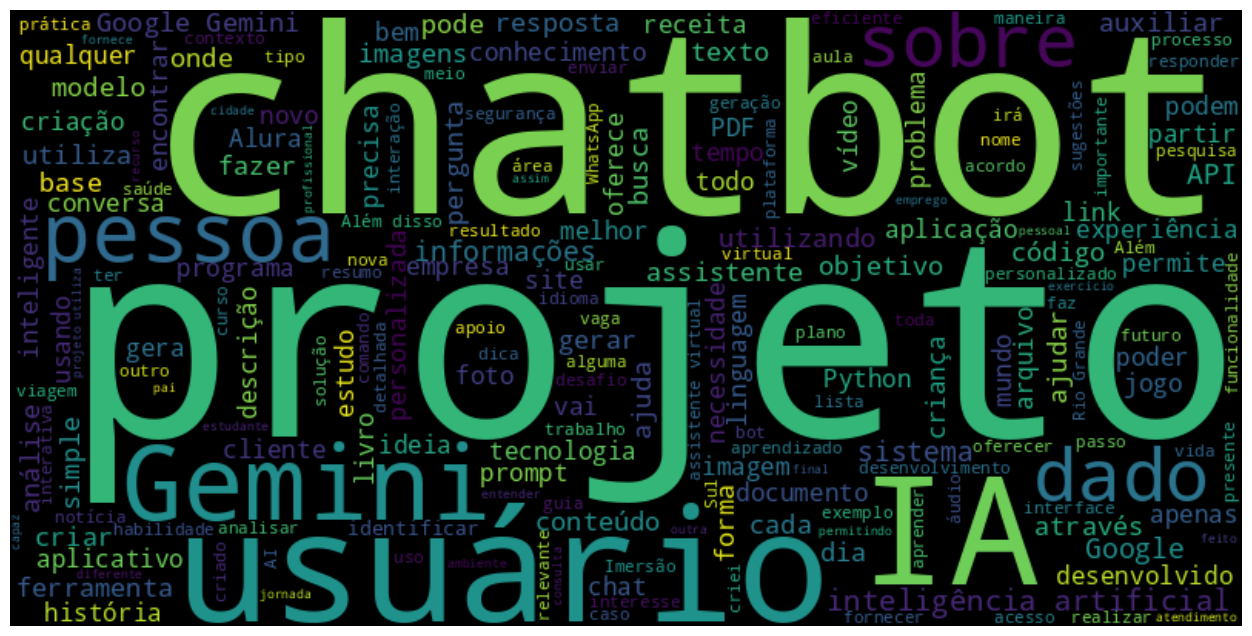

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=pt_stopwords, width=800, height=400).generate(' '.join(projects_data['descricao']))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
projects_data.head()

,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora
0,Erik Teixeira Barbosa,https://github.com/ErikTeixeira/projeto_ia.git,"Conheça o ChefBot, seu assistente de planejame...",2024-05-11 14:32:00,6,github.com,projeto_ia.git,804,128,2024-05-11 15:00:00
1,Alléxia,https://github.com/allexia1/desafio-imersao-ia,Chatbot para Plano de Negócios com API Gemini ...,2024-05-11 14:32:00,2,github.com,desafio-imersao-ia,245,38,2024-05-11 15:00:00
2,Silvio Felipe Pereira Gil,NaN,Chat GPT,2024-05-11 14:33:00,2,NaN,NaN,8,2,2024-05-11 15:00:00
3,Matheus Monclai das Chagas Pizziolo,https://github.com/monclai/assistente_estudantil,Professor particular para auxiliar estudante e...,2024-05-11 14:34:00,12,github.com,assistente_estudantil,108,15,2024-05-11 15:00:00
4,Sadi Eloi Closs Junior,https://github.com/Rargren/Projeto_Imersao_IA,Um ChatBot simples para execução de uma campan...,2024-05-11 14:34:00,2,github.com,Projeto_Imersao_IA,55,10,2024-05-11 15:00:00


# 3. Embeddings

## 3.1. Criar os embeddings

In [26]:
def embed_text(text, model='models/embedding-001', task_type='CLUSTERING'):
    return genai.embed_content(model=model, content=text, task_type=task_type)['embedding']

In [27]:
# Cria os embedding
projects_data['embedding'] = projects_data['descricao'].apply(embed_text)
projects_data.head()

,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding
0,Erik Teixeira Barbosa,https://github.com/ErikTeixeira/projeto_ia.git,"Conheça o ChefBot, seu assistente de planejame...",2024-05-11 14:32:00,6,github.com,projeto_ia.git,804,128,2024-05-11 15:00:00,"[0.017685656, -0.018120011, -0.05080278, -0.01..."
1,Alléxia,https://github.com/allexia1/desafio-imersao-ia,Chatbot para Plano de Negócios com API Gemini ...,2024-05-11 14:32:00,2,github.com,desafio-imersao-ia,245,38,2024-05-11 15:00:00,"[0.03586832, -0.05657798, -0.035664394, -0.008..."
2,Silvio Felipe Pereira Gil,NaN,Chat GPT,2024-05-11 14:33:00,2,NaN,NaN,8,2,2024-05-11 15:00:00,"[0.08919859, -0.017952869, -0.06950249, -0.039..."
3,Matheus Monclai das Chagas Pizziolo,https://github.com/monclai/assistente_estudantil,Professor particular para auxiliar estudante e...,2024-05-11 14:34:00,12,github.com,assistente_estudantil,108,15,2024-05-11 15:00:00,"[0.04339775, -0.040498942, 0.02009885, 0.03546..."
4,Sadi Eloi Closs Junior,https://github.com/Rargren/Projeto_Imersao_IA,Um ChatBot simples para execução de uma campan...,2024-05-11 14:34:00,2,github.com,Projeto_Imersao_IA,55,10,2024-05-11 15:00:00,"[0.05898331, -0.04620617, -0.029510133, -0.006..."


## 3.2. Criar a matriz de semelhança

In [28]:
projects_embeddings = np.stack(projects_data['embedding'])
projects_embeddings.shape

(809, 768)

In [29]:
similarity = np.tensordot(projects_embeddings, projects_embeddings, (1, 1))
similarity.shape

(809, 809)

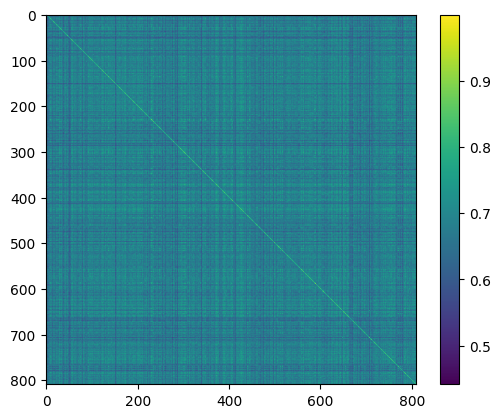

In [30]:
plt.imshow(similarity)
plt.colorbar()
plt.show()

# 4. Buscas e visualizações

## 4.1. Buscar por projetos similares procurando por autor

In [31]:
def search_similar_projects(project_id, quant=10):
    similar = similarity[project_id].argsort()[-quant-1:-1][::-1]
    similar_projects = projects_data.iloc[similar, :5]
    similar_projects.insert(0, 'semelhanca', similarity[project_id][similar])
    return similar_projects

In [32]:
search_autor = 'André Ferreira Martins'
project_id = projects_data.query('autor == @search_autor').index[0]
search_similar_projects(project_id)

,semelhanca,autor,link,descricao,enviado,estrelas
249,0.869169,kEVIN DE FREITAS MENZONI PAULINO,https://github.com/kevinmenz/Solucao_Reforma_F...,Chat Bot criado para auxiliar pessoas no plane...,2024-05-11 01:50:00,9
696,0.862169,Leonardo Dias Diene,https://github.com/diasdiene/Crie-o-seu-Pr-pri...,Transforme sua visão em roteiro com o poder da...,2024-05-10 01:41:00,4
516,0.853422,Darcio Romão dos Reis,https://github.com/DarcioRR/Projeto_imersao_IA...,Chatbot de receitas rápidas e simples,2024-05-10 19:00:00,3
513,0.850930,Clayton Cavalcante de Lucena,https://github.com/ClaytonFullStack/Projeto_Im...,Criar um chatbot para atendimento ao cliente. ...,2024-05-10 18:57:00,2
737,0.849258,Edison Esequiel,https://github.com/esequielsantos/ediBot,Este Bot com inteligencia artificial serve com...,2024-05-09 21:54:00,5
635,0.847902,Thiago Bruno da Silva Pereira,https://github.com/TB-Pereira/Projeto_ChatProj...,Chatbot desenvolvido para fornecer apoio aos g...,2024-05-10 03:59:00,44
650,0.846054,Thiago Santos de Araujo,https://github.com/osrraposo/Projeto_Assistent...,Assistente Virtual para Organização Pessoal: E...,2024-05-10 07:45:00,4
297,0.841943,Henrique Taranto,https://github.com/tarantos96/ChatBot_DuvidasR...,Chatbot para responder duvidas sobre os produt...,2024-05-11 00:01:00,12
808,0.840167,YOLANDA RODRIGUES SILVA ORTIZ DE SOUZA,https://github.com/yolanda-ortiz/Projeto-Alura...,Com o objetivo de facilitar o acesso à informa...,2024-05-12 03:47:00,1
29,0.839980,Luí Felipe Mori,https://github.com/luisfe0604/sofIA,Um chatbot que se comporta como assitente pess...,2024-05-12 03:23:00,1


## 4.2. Redução de dimensionalidade

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(similarity)
projects_data['vis_x'] = vis_dims[:, 0]
projects_data['vis_y'] = vis_dims[:, 1]

In [34]:
def plot_similar(project_id):
    other_projects = projects_data.drop(project_id)

    hovertemplate = '<b>%{customdata[0]}</b><br>Autor: %{customdata[1]}<br>Link: %{customdata[2]}'
    custom_data = [
        other_projects['titulo'],
        other_projects['autor'],
        other_projects['link'],
    ]

    marker_data = [
        projects_data.iloc[project_id][['titulo','autor', 'link']]
    ]
    marker_x = [vis_dims[project_id][0]]
    marker_y = [vis_dims[project_id][1]]

    project_name = projects_data.iloc[project_id]['titulo']
    project_similarity = np.delete(similarity[project_id], project_id, axis=0)

    fig = px.scatter(other_projects, x='vis_x', y='vis_y', color=project_similarity, opacity=0.7,
                     custom_data=custom_data,
                     title=f'Semelhança com o projeto "{project_name}" (id={project_id})')

    fig.add_trace(go.Scatter(x=marker_x, y=marker_y, mode='markers', marker_symbol='star', marker_size=15,
                             hovertemplate=hovertemplate, customdata=marker_data))

    fig.update_traces(hovertemplate=hovertemplate)
    fig.update_layout(xaxis_title='X', yaxis_title='Y',
                      width=1000, height=1000, showlegend=False)
    fig.show()

In [35]:
plot_similar(project_id)

## 4.3. Clusterização

In [50]:
from sklearn.cluster import KMeans

n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(similarity);
projects_data['cluster'] = kmeans.labels_.astype(str)

In [51]:
hovertemplate = '<b>%{customdata[0]}</b><br>Autor: %{customdata[1]}<br>Link: %{customdata[2]}'
custom_data = [
    projects_data['titulo'],
    projects_data['autor'],
    projects_data['link'],
]

fig = px.scatter(projects_data, x='vis_x', y='vis_y', color='cluster', custom_data=custom_data,
                 category_orders={'cluster': [str(x) for x in range(n_clusters)]},
                 color_discrete_sequence=px.colors.qualitative.G10, opacity=0.7,
                 title=f'Clusterização dos projetos com {n_clusters} clusters')
fig.update_traces(hovertemplate=hovertemplate)
fig.update_layout(xaxis_title='X', yaxis_title='Y',
                  width=1000, height=1000, coloraxis_showscale=False)
fig.show()

## 4.4. Análise dos clusters

In [52]:
sorted(projects_data['cluster'].unique())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [53]:
projects_clusters = [projects_data.query('cluster == @i') for i in sorted(projects_data['cluster'].unique())]

print('Tamanho dos clusters:')
for i, cluster in enumerate(projects_clusters):
    print(f'Cluster {i}: {len(cluster)} projetos')

Tamanho dos clusters:
Cluster 0: 92 projetos
Cluster 1: 90 projetos
Cluster 2: 118 projetos
Cluster 3: 140 projetos
Cluster 4: 19 projetos
Cluster 5: 80 projetos
Cluster 6: 87 projetos
Cluster 7: 65 projetos
Cluster 8: 8 projetos
Cluster 9: 110 projetos


In [54]:
# Define parametros do modelo
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 0,
    "max_output_tokens": 8192,
}

In [55]:
# Define as configurações de segurança
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

In [56]:
# Instancia o modelo com as configurações especificadas
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [57]:
prompt = 'Eu tenho um dataset com inumeros projetos que utilizam o modelo Gemini para resolver problemas de diversas áreas. Eu executei um algoritmo de clusterização e separei esses projetos em clusters. O texto a seguir é a combinação da descrição de cada projeto separado por "---". Quero que tente identificar qual a carecteristica comum dos projetos desse cluster. Seja o mais específico possível mas mantenha a resposta à no máximo algumas palavras. Não adicione nenhuma informação extra à resposta:\n'

In [77]:
def cluster_summary(num):
    print(f'Cluster {num}: {len(projects_clusters[num])} projetos')
    answer = model.generate_content(prompt + '\n---\n'.join(projects_clusters[num]['descricao']))
    print(answer.text)
    display(projects_clusters[num].sort_values('estrelas', ascending=False).head())
    return answer.text

In [78]:
clusters_description = [''] * n_clusters

In [79]:
clusters_description[0] = cluster_summary(0)

Cluster 0: 92 projetos
Análise e processamento de documentos e imagens. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
781,Giovanna da Silva de Oliveira,https://github.com/Giovanna-de-Oliveira/Portif...,O foco deste projeto é abordar a detecção do u...,2024-05-09 17:52:00,113,github.com,Portifolio,385,65,2024-05-09 18:00:00,"[0.021195045, 0.021553503, -0.037690286, 0.013...",-3.722214,10.238577,0
798,Laysa Maria Nascimento Alves,https://github.com/laysaalves/medgrandma-ai,Criei o MedGrandma.ai inspirado na minha vida ...,2024-05-09 19:35:00,79,github.com,medgrandma-ai,673,107,2024-05-09 20:00:00,"[0.020860605, -0.016272252, -0.017882077, 0.01...",-26.217966,0.902244,0
772,Gabriel Vilela Carvalho de Souza,https://github.com/Dev-ilela/PassAKI,Ele se chama PassAki e o propósito dele é atra...,2024-05-09 15:43:00,30,github.com,PassAKI,342,63,2024-05-09 16:00:00,"[0.0408662, -0.026391229, -0.06255627, 0.01098...",-9.953761,12.487404,0
211,Renata Cristiane Leite,https://github.com/Renata00000/Story-teller,"contador de historias, para crianças.. do qual...",2024-05-11 03:34:00,25,github.com,Story-teller,283,46,2024-05-11 04:00:00,"[0.009229758, -0.030867757, -0.066947326, 0.03...",11.474374,-10.534582,0
122,Bruno Martins dos Santos,https://github.com/bnomartins/JarvisParaSa-de,O projeto Jarvis para a saúde é um projeto des...,2024-05-11 12:20:00,23,github.com,JarvisParaSa-de,1022,180,2024-05-11 12:00:00,"[0.02234172, -0.04072212, -0.032030355, 0.0366...",-25.842222,0.711474,0


In [81]:
clusters_description[1] = cluster_summary(1)

Cluster 1: 90 projetos
Assistentes ou ferramentas de produtividade usando IA. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
554,João Paulo,https://github.com/jpos92/projeto_imersao_ia,Indentificador de fraudes em processos licitat...,2024-05-10 16:37:00,67,github.com,projeto_imersao_ia,51,6,2024-05-10 17:00:00,"[0.017602663, -0.025530767, -0.031596933, -0.0...",5.677336,27.040298,1
315,Radirley Fernandes,https://github.com/R4dy/PersonalVacation,Personal Vacation - O Seu Agente de Viagens De...,2024-05-11 00:46:00,55,github.com,PersonalVacation,452,82,2024-05-11 01:00:00,"[0.007552528, -0.02559705, -0.046549756, 0.009...",14.222239,11.484276,1
572,Thais Santana Santos,https://github.com/YARKGRIS/REDA-O-ENEM.git,Meu projeto é sobre a redação do ENEM . Onde e...,2024-05-10 17:37:00,52,github.com,REDA-O-ENEM.git,79,16,2024-05-10 18:00:00,"[-0.0036361082, -0.020605098, -0.062350724, 0....",7.155735,39.407265,1
739,Marcos Valério de Almeida Nunes,https://github.com/marcosnunesmbs/mynextread,Quem nunca terminou de ler um livro e ficou na...,2024-05-09 22:14:00,38,github.com,mynextread,523,96,2024-05-09 22:00:00,"[0.016944299, 0.0050615636, -0.023896076, 0.00...",-38.288616,25.826696,1
318,Maria Luiza Barros Dias,https://github.com/Maria-Luiza-Barros-Dias-dev...,dIAg é um Sistema Inteligente para Análise de ...,2024-05-11 00:49:00,26,github.com,dIAg,291,45,2024-05-11 01:00:00,"[0.02218918, 0.0043889377, -0.025796248, 0.019...",8.470164,29.183861,1


In [82]:
clusters_description[2] = cluster_summary(2)

Cluster 2: 118 projetos
Chatbots com diversas funcionalidades. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
761,Bruno da Silva,https://github.com/bruninho-design/AjudaOSul.A...,O AjudaOSul.AI é um projeto de código aberto q...,2024-05-09 23:48:00,81,github.com,AjudaOSul.AI-ImersaoAlura,349,56,2024-05-10 00:00:00,"[0.016232997, -0.024508756, -0.04338939, 0.006...",4.653328,-30.562738,2
579,Tomas Rodrigues Alessi,https://github.com/alessitomas/EmpregoConnect,O EmpregoConnect é uma plataforma que conta co...,2024-05-10 12:42:00,81,github.com,EmpregoConnect,354,49,2024-05-10 13:00:00,"[0.030737696, -0.058653917, -0.03310471, -0.01...",18.178802,-31.768152,2
356,Ellen Karolina do Couto Gomes de Oliveira,https://github.com/EllenKarolina1/projeto-imer...,Chatbot que entrega copy de criativos de socia...,2024-05-10 22:57:00,75,github.com,projeto-imersao-alura-com-google,100,16,2024-05-10 23:00:00,"[0.058473844, -0.094236515, -0.03353368, -0.02...",29.016409,-37.498970,2
384,Anna Giulia Pereira Verissimo Ferreira,https://github.com/GIIUPEREIRA/Imersao_Alura_P...,O projeto Alerta Máximo: O chatbot que te guia...,2024-05-10 23:42:00,68,github.com,Imersao_Alura_Projeto,636,99,2024-05-11 00:00:00,"[0.015990727, -0.0038171278, -0.03182293, 0.02...",5.709336,-30.989601,2
332,Thômas Ximendes Romero,https://github.com/Mr-Thom/PerigosoOuNao,PerigosoOuNão? é um ChatBOT inspirado em minha...,2024-05-11 01:19:00,55,github.com,PerigosoOuNao,937,140,2024-05-11 01:00:00,"[0.015668303, -0.062026832, -0.011755641, 0.03...",15.760758,-27.732307,2


In [83]:
clusters_description[3] = cluster_summary(3)

Cluster 3: 140 projetos
Processamento de linguagem natural (NLP) com Google Gemini. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
764,Victor Verdoodt,https://github.com/victorverdoodt/Disaster-Res...,O projeto Disaster Response Coordinator é uma ...,2024-05-09 14:01:00,105,github.com,Disaster-Response-Coordinator,427,60,2024-05-09 14:00:00,"[0.010692242, -0.015391236, -0.027628016, 0.02...",-49.879074,4.958778,3
349,Alielson Ferreira Pequeno,https://github.com/alielsonfp/DataGemini/tree/...,DataGemini é uma ferramenta poderosa que combi...,2024-05-10 22:44:00,72,github.com,DataGemini,620,87,2024-05-10 23:00:00,"[0.034931958, -0.021008264, -0.0443244, 0.0201...",-47.162304,11.822865,3
295,Thyago Jesus,https://github.com/thyagojesus/Melhorar-casos-N1,Olá Analista de Suporte. Este projeto utiliza ...,2024-05-10 23:58:00,46,github.com,Melhorar-casos-N1,250,41,2024-05-11 00:00:00,"[0.027634358, -0.036892854, -0.027464697, 0.02...",-43.223907,-18.393089,3
347,Edijanio de Souza Barros,https://github.com/edijaniosouza/resume-analyser,Aplicativo Android com foco com objetivo de aj...,2024-05-10 22:41:00,45,github.com,resume-analyser,337,57,2024-05-10 23:00:00,"[0.034598902, -0.024595935, -0.029706309, 0.01...",-53.640747,-13.904157,3
587,Marcos José Guedes Júnior,https://github.com/programecomguedes/InspecaoV...,O Car Inspection AI é uma solução que utiliza ...,2024-05-10 13:07:00,36,github.com,InspecaoVeicularPythonGoogleGemini,449,69,2024-05-10 13:00:00,"[0.022842199, -0.0047318665, -0.031363074, 0.0...",-44.377258,17.070332,3


In [84]:
clusters_description[4] = cluster_summary(4)

Cluster 4: 19 projetos
Aplicações de Gemini. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
152,Talita Gomes Lisboa Piccolo,https://github.com/TalyLisboa/Jedai_Talita_Lis...,IA Jedai,2024-05-11 05:13:00,7,github.com,Jedai_Talita_Lisboa_ChatBot_Imersao,8,2,2024-05-11 05:00:00,"[0.01317584, -0.016070254, -0.008346249, -0.04...",47.174438,47.444695,4
287,Marcillio Mattos Chaves,https://github.com/CiMattosCH/Imersao_IA_Proje...,O que fazer após uma parada cardiorrespiratória,2024-05-11 02:54:00,6,github.com,Imersao_IA_Projeto1,47,7,2024-05-11 03:00:00,"[0.026837584, -0.013812138, -0.018028174, -0.0...",37.747940,44.070206,4
767,Paulo Gabriel Silva,https://github.com/pagasiyt/ChatBot,.,2024-05-09 14:29:00,5,github.com,ChatBot,1,1,2024-05-09 14:00:00,"[0.021532567, -0.053240657, -0.015618722, -0.0...",40.945217,44.220604,4
276,Maximo Moreno,https://github.com/More-Apps/gemini,This Ruby gem identifies the input field withi...,2024-05-11 02:31:00,5,github.com,gemini,265,41,2024-05-11 03:00:00,"[0.031747356, -0.06331587, -0.0338746, -0.0128...",44.398033,42.511814,4
227,Eduardo Judici,https://github.com/edujudici/google_quickstart...,My Simple Quickstart Colab,2024-05-11 04:04:00,4,github.com,google_quickstart_colab,26,4,2024-05-11 04:00:00,"[0.06742902, -0.008768115, -0.03330643, -0.078...",45.515377,44.169418,4


In [85]:
clusters_description[5] = cluster_summary(5)

Cluster 5: 80 projetos
Aplicações de IA em diversas áreas. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
245,Eduardo Freitas,https://github.com/eduardoboca/YouTubeClipper,YouTubeClipper é uma ferramenta que facilita a...,2024-05-11 01:39:00,71,github.com,YouTubeClipper,102,17,2024-05-11 02:00:00,"[0.02722317, -0.035697084, -0.037199467, 0.002...",30.866825,33.621593,5
286,Pedro Lucas Corrêa Oliveira,https://github.com/pedro-lucaspyt/ChronoWrite-...,ChronoWrite: A História Nunca Foi Tão Flexíve...,2024-05-11 02:53:00,68,github.com,ChronoWrite-AI-Storyteller,979,148,2024-05-11 03:00:00,"[0.03104858, -0.0050365594, -0.040122375, 0.00...",30.600170,25.566574,5
340,Gabriel Centeio Freitas,https://github.com/GabrielCenteioFreitas/FindT...,Tailwind CSS é um framework CSS que visa a uti...,2024-05-10 22:28:00,61,github.com,FindTheClosestTailwindColors-v2,928,151,2024-05-10 22:00:00,"[0.041940473, -0.030344168, -0.054041374, -0.0...",15.963647,38.880550,5
179,Rafael Neres Lima,https://github.com/rafanereslima/KidsTV-iOS,"Crianças são exploradoras natas, famintas por ...",2024-05-11 06:54:00,31,github.com,KidsTV-iOS,612,105,2024-05-11 07:00:00,"[0.013389735, -0.0036141821, -0.053120323, 0.0...",28.880056,25.530039,5
442,Enzo Frazão Vencio,https://github.com/EnzoFrazao/Project_IA,Guia de Viagens IA.,2024-05-10 19:29:00,18,github.com,Project_IA,19,4,2024-05-10 19:00:00,"[0.02195859, -0.013210449, -0.035613008, -0.05...",22.090780,38.754681,5


In [86]:
clusters_description[6] = cluster_summary(6)

Cluster 6: 87 projetos
Aplicações de IA em diversas áreas 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
755,Cleobeto Junior,https://github.com/jrmesquita7/ementario_gemini/,Este projeto consiste em um prompt criado com ...,2024-05-09 23:34:00,62,github.com,ementario_gemini,807,132,2024-05-10 00:00:00,"[0.031556904, -0.037256505, -0.01716714, 0.014...",-45.503296,-17.161747,6
629,Lucas Miranda da Silva,https://github.com/LucasMiranda7/projetoMesa_C...,Mesa Compartilhada um Projeto/Campanha que vis...,2024-05-10 02:56:00,46,github.com,projetoMesa_Compartilhada,1020,169,2024-05-10 03:00:00,"[0.046021372, -0.028485065, -0.056054503, 0.01...",5.606922,-32.683826,6
583,Vinícius Pereira Martins,https://github.com/ViniPMartins/AI-language-te...,Que tal um Professor de Linguas Particular? Es...,2024-05-10 12:51:00,33,github.com,AI-language-teacher,287,46,2024-05-10 13:00:00,"[0.019390246, -0.03764713, -0.023575425, 0.001...",-3.482990,-16.753721,6
421,Alicia Faria,https://github.com/nearbykatayama/GooRecipe,"Olá pessoal! Para o meu projeto final, eu crie...",2024-05-10 21:55:00,30,github.com,GooRecipe,1019,184,2024-05-10 22:00:00,"[0.012485191, -0.04258527, -0.021961538, -0.01...",20.920092,-26.381800,6
662,Anderson Pacheco,https://github.com/estimulaai/projeto,Descubra o EstimulaAI - inspirado pela jornad...,2024-05-10 11:12:00,30,github.com,projeto,481,76,2024-05-10 11:00:00,"[0.007463186, -0.002899275, -0.040773727, 0.02...",-15.401260,-13.605970,6


In [87]:
clusters_description[7] = cluster_summary(7)

Cluster 7: 65 projetos
Chatbots com foco em diversas áreas. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
623,Maryane de Castro Lima,https://github.com/maryane-castro/chatbot-fi,O projeto consiste em um ChatBot desenvolvido ...,2024-05-10 14:45:00,62,github.com,chatbot-fi,1006,141,2024-05-10 15:00:00,"[0.015483367, -0.025418824, -0.04535009, 0.021...",3.155434,-42.823765,7
174,Nickolas Lima Ferreira,https://github.com/nickolasL13/gemini_ai/tree/...,Este projeto tem como objetivo a criação de um...,2024-05-11 06:31:00,45,github.com,gemini_ai,257,38,2024-05-11 07:00:00,"[0.026763156, -0.05757814, -0.054402635, -0.01...",2.131555,-46.664639,7
635,Thiago Bruno da Silva Pereira,https://github.com/TB-Pereira/Projeto_ChatProj...,Chatbot desenvolvido para fornecer apoio aos g...,2024-05-10 03:59:00,44,github.com,Projeto_ChatProject_IA_Alura_Google,152,22,2024-05-10 04:00:00,"[0.046668123, -0.039526943, -0.029881498, -0.0...",10.222211,-46.784496,7
741,Allan maciel gomes galvao,https://github.com/allanti/gemini_chat/tree/main,Chatbot de Guia de Estudos Personalizado. Imag...,2024-05-09 22:22:00,30,github.com,gemini_chat,626,96,2024-05-09 22:00:00,"[0.06361645, -0.040664453, -0.04296076, -0.010...",4.309557,-51.249714,7
265,Vivian Fátima de Lima,https://github.com/Vivianflima/Projeto_Imersao...,Está estudando para alguma certificação ou con...,2024-05-11 02:18:00,23,github.com,Projeto_ImersaoIA_MeuSimulado,343,56,2024-05-11 02:00:00,"[0.05478488, -0.064800344, -0.019498529, -0.03...",4.404471,-50.629131,7


In [88]:
clusters_description[8] = cluster_summary(8)

Cluster 8: 8 projetos
Chatbots. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
770,Edison Esequiel dos Santos,https://github.com/esequielsantos/ediBot/tree/...,Simple Chat Bot,2024-05-09 15:27:00,4,github.com,ediBot,15,3,2024-05-09 15:00:00,"[0.06611513, -0.06237266, -0.0054451358, -0.04...",49.527660,36.474941,8
779,Igor Lima Charles,https://github.com/igorlimacharles/imersaoIA,ChatBot,2024-05-09 17:14:00,4,github.com,imersaoIA,7,1,2024-05-09 17:00:00,"[0.079792686, -0.075251594, -0.040201046, -0.0...",50.621414,37.049355,8
221,Giovani Paleologo,https://github.com/GiovaniJau/gemini_example,Talk To Anything - Converse por chat com qualq...,2024-05-11 03:55:00,3,github.com,gemini_example,55,10,2024-05-11 04:00:00,"[0.041507628, -0.049929105, -0.034984574, -0.0...",41.044472,23.218649,8
379,Gabriel Clein Consoni,https://github.com/Consoni21/ChatBot/blob/main...,Chatbot simples,2024-05-10 23:39:00,3,github.com,ChatBot,15,2,2024-05-11 00:00:00,"[0.059563853, -0.06953207, -0.020230938, -0.05...",49.603588,37.349823,8
775,Eris Braggi,https://github.com/erisbraggi/chatbottest/blob...,Chatbot,2024-05-09 16:41:00,3,github.com,chatbottest,7,1,2024-05-09 17:00:00,"[0.07892827, -0.08146571, -0.03033843, -0.0736...",50.542007,36.380058,8


In [89]:
clusters_description[9] = cluster_summary(9)

Cluster 9: 110 projetos
Assistentes virtuais personalizados. 



,autor,link,descricao,enviado,estrelas,dominio,titulo,descricao_caracteres,descricao_palavras,enviado_hora,embedding,vis_x,vis_y,cluster
640,Claudio César Martins,https://github.com/claudiocmm/My_Polyglot_App,Aprenda idiomas como nunca antes com My Polygl...,2024-05-10 04:33:00,87,github.com,My_Polyglot_App,692,104,2024-05-10 05:00:00,"[0.026042726, -0.017974121, -0.0053990707, 0.0...",29.333654,1.948270,9
521,Kaled Freire Barreto,https://github.com/kaledbarreto/SophIA,"Olá pessoal! Sou a Sophia, a Sábia! Uma profe...",2024-05-10 19:09:00,83,github.com,SophIA,610,104,2024-05-10 19:00:00,"[0.057751894, -0.02530945, -0.017982585, -0.02...",32.284897,0.315814,9
488,Fellipe Luz Souza Machado,https://github.com/chulipinho/summit,O Summit usa a Inteligência Artificial do Goog...,2024-05-10 17:55:00,71,github.com,summit,411,69,2024-05-10 18:00:00,"[0.034642562, -0.026473496, -0.015874315, 0.00...",-25.860453,23.297499,9
773,Rodrigo Alexandre,https://github.com/narradorww/pet-rescue-gemini,"Scooby-Doo, cade você? — Resposta Tecnológica ...",2024-05-09 15:55:00,71,github.com,pet-rescue-gemini,832,122,2024-05-09 16:00:00,"[0.0355295, -0.012390938, -0.035989717, 0.0331...",8.359016,-18.991503,9
320,Vinicius Silva,https://github.com/viniciusgdr/TomoriBOTGemini,TomoriBOT WhatsApp - Alimentado por IA O Tomor...,2024-05-11 00:51:00,59,github.com,TomoriBOTGemini,1017,151,2024-05-11 01:00:00,"[0.060551994, -0.06144509, -0.022015797, 0.005...",27.672432,-14.111432,9


In [90]:
clusters_description

['Análise e processamento de documentos e imagens. \n',
 'Assistentes ou ferramentas de produtividade usando IA. \n',
 'Chatbots com diversas funcionalidades. \n',
 'Processamento de linguagem natural (NLP) com Google Gemini. \n',
 'Aplicações de Gemini. \n',
 'Aplicações de IA em diversas áreas. \n',
 'Aplicações de IA em diversas áreas \n',
 'Chatbots com foco em diversas áreas. \n',
 'Chatbots. \n',
 'Assistentes virtuais personalizados. \n']